In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [41]:
PATH = "tmp/df_1minute_1yearago"
df = pd.read_feather(PATH)

In [42]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [43]:
df.head().transpose()

,0,1,2,3,4
open time,2019-02-27 12:42:00,2019-02-27 12:43:00,2019-02-27 12:44:00,2019-02-27 12:45:00,2019-02-27 12:46:00
open,3822.81000000,3822.88000000,3821.86000000,3821.50000000,3822.77000000
high,3822.98000000,3822.90000000,3822.75000000,3823.08000000,3822.96000000
low,3822.02000000,3821.83000000,3821.00000000,3821.00000000,3819.33000000
close,3822.88000000,3821.84000000,3821.77000000,3823.00000000,3819.99000000
volume,10.45078000,23.87689200,14.93154600,12.13776500,17.13506200
close time,2019-02-27 12:42:59,2019-02-27 12:43:59,2019-02-27 12:44:59,2019-02-27 12:45:59,2019-02-27 12:46:59
quote asset volume,39947.81499464,91262.67234072,57062.86173317,46395.67586780,65462.03399792
number of trades,68,121,114,114,99
taker buy based asset volume,5.20190000,4.70267900,6.21381000,8.13017200,6.64419100


In [ ]:
#import time
#for i in range(len(df)):
#    temp = df.iloc[i][6]
#    temp = temp[:-3]
#    temp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(temp)))
#    df.iloc[i][6] = temp    
#    print(temp)
#df.to_feather(PATH)

In [44]:
df.head().transpose()

,0,1,2,3,4
open time,2019-02-27 12:42:00,2019-02-27 12:43:00,2019-02-27 12:44:00,2019-02-27 12:45:00,2019-02-27 12:46:00
open,3822.81000000,3822.88000000,3821.86000000,3821.50000000,3822.77000000
high,3822.98000000,3822.90000000,3822.75000000,3823.08000000,3822.96000000
low,3822.02000000,3821.83000000,3821.00000000,3821.00000000,3819.33000000
close,3822.88000000,3821.84000000,3821.77000000,3823.00000000,3819.99000000
volume,10.45078000,23.87689200,14.93154600,12.13776500,17.13506200
close time,2019-02-27 12:42:59,2019-02-27 12:43:59,2019-02-27 12:44:59,2019-02-27 12:45:59,2019-02-27 12:46:59
quote asset volume,39947.81499464,91262.67234072,57062.86173317,46395.67586780,65462.03399792
number of trades,68,121,114,114,99
taker buy based asset volume,5.20190000,4.70267900,6.21381000,8.13017200,6.64419100


In [45]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [46]:
TRAIN_SPLIT = 400000

In [47]:
tf.random.set_seed(13)

In [48]:
df_temp = df.drop(['open time','close time'], axis=1).astype('float')
df_temp.insert(loc= 0, column='open time', value=df['open time'])
df_temp.insert(loc= 6, column='close time', value=df['close time'])
df = df_temp

In [49]:
uni_data = df['close']
uni_data.index = df['close time']
uni_data.head()

close time
2019-02-27 12:42:59    3822.88
2019-02-27 12:43:59    3821.84
2019-02-27 12:44:59    3821.77
2019-02-27 12:45:59    3823.00
2019-02-27 12:46:59    3819.99
Name: close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e104a54d0>],
      dtype=object)

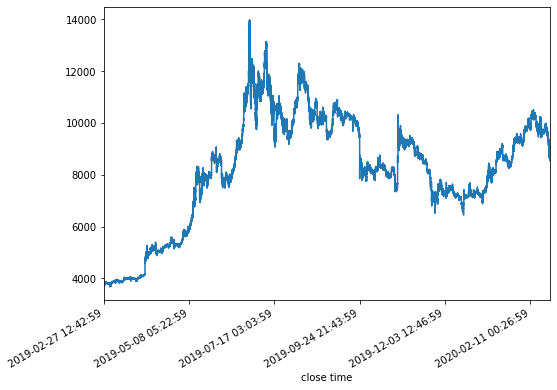

In [50]:
uni_data.plot(subplots=True)

In [51]:
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [52]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)


In [53]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.80123616]
 [-1.8016712 ]
 [-1.80170048]
 [-1.80118597]
 [-1.80244506]
 [-1.80118178]
 [-1.80034936]
 [-1.80034936]
 [-1.80034518]
 [-1.80083878]
 [-1.80134492]
 [-1.80118597]
 [-1.80117342]
 [-1.80161264]
 [-1.80159591]
 [-1.80114414]
 [-1.800981  ]
 [-1.80127381]
 [-1.80076766]
 [-1.7999687 ]]

 Target temperature to predict
-1.8007007348228758


In [54]:
uni_data

array([-1.80123616, -1.8016712 , -1.80170048, ...,  0.26774918,
        0.27234634,  0.26877403])

In [55]:
def create_time_steps(length):
  return list(range(-length, 0))

In [56]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/home/batu/anaconda3/envs/tradebot/lib/python3.7/site-packages/matplotlib/pyplot.py'>

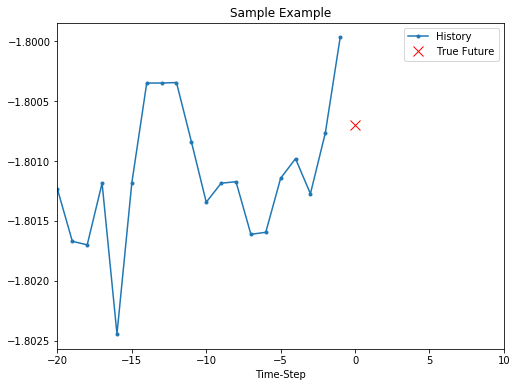

In [57]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')


In [58]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/home/batu/anaconda3/envs/tradebot/lib/python3.7/site-packages/matplotlib/pyplot.py'>

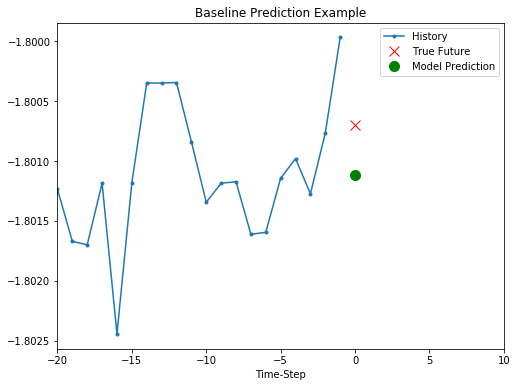

In [59]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [60]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [61]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [62]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [63]:
EVALUATION_INTERVAL = TRAIN_SPLIT
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 400000 steps, validate for 50 steps
Epoch 1/10
 62126/400000 [===>..........................] - ETA: 59:27 - loss: 0.0060

KeyboardInterrupt: 

In [ ]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [ ]:
features_considered = ['open','close','high','low','volume']

In [ ]:
features = df[features_considered]
features.index = df['close time']
features.head()

In [ ]:
features.plot(subplots=True)

In [ ]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
past_history = 7200
future_target = 720
STEP = 60

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [ ]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()